# 新东方
## 监督学习
## 项目: 学员续报估计

----
## 探索数据
读取数据，可视化

In [1]:
# 为这个项目导入需要的库
import json
import xlrd
import numpy as np
import pandas as pd
from time import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 允许为DataFrame使用display()
from IPython.display import display 

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入数据
xlsx_data = pd.read_excel('data/sample2.xlsx', usecols=[3,7,8,9,11,12,17,18,22,23,25,26,27,28,31,33,34,35,36])

# 重命名列名
# '班型': 'classType',
# '班级标价': 'markPrice', 
# '实际缴费金额': 'actualPayment', 
# '平均后实缴金额': 'meanActualPayment', 
# '年级': 'grade', 
# '科目': 'subject', 
# '离班课次': 'outClassTimes', 
# '课次': 'classTimes', 
# '进班课次': 'enterTimes', 
# '是否报下个季度': 'isEntryNextQuarter', 
# '主代课教师': 'mainTeacher', 
# '是否管理者': 'isManager ', 
# '教师教龄（月）': 'lengthOfTeaching', 
# '教师性别': 'sex', 
# '是否是四类人才': 'isFourTypesTalent', 
# '学历': 'education', 
# '学员前三季度是否报读': 'isEntryTheFirstThreeQuarters', 
# '学员本次报读前报读过多少次本科目': 'enrollTimesBeforeThisTime', 
# '学员本次报读前报读过多少次全部科目': 'enrollAlllSubjectTimesBeforeThisTime'
xlsx_data.rename(columns={'班型': 'classType', '班级标价': 'markPrice', '实际缴费金额': 'actualPayment', '平均后实缴金额': 'meanActualPayment', '年级': 'grade', '科目': 'subject', '离班课次': 'outClassTimes', '课次': 'classTimes', '进班课次': 'enterTimes', '是否报下个季度': 'isEntryNextQuarter', '主代课教师': 'mainTeacher', '是否管理者': 'isManager ', '教师教龄（月）': 'lengthOfTeaching', '教师性别': 'sex', '是否是四类人才': 'isFourTypesTalent', '学历': 'education', '学员前三季度是否报读': 'isEntryTheFirstThreeQuarters', '学员本次报读前报读过多少次本科目': 'enrollTimesBeforeThisTime', '学员本次报读前报读过多少次全部科目': 'enrollAlllSubjectTimesBeforeThisTime'}, inplace=True)

# 成功 - 显示第一条记录
display(xlsx_data.head())

,classType,markPrice,actualPayment,meanActualPayment,grade,subject,outClassTimes,classTimes,enterTimes,isEntryNextQuarter,mainTeacher,isManager,lengthOfTeaching,sex,isFourTypesTalent,education,isEntryTheFirstThreeQuarters,enrollTimesBeforeThisTime,enrollAlllSubjectTimesBeforeThisTime
0,志高,299,299.0,100.333333,初一,数学,0,9,0,是,杨浩然,NaN,15.533333,男,是,本科,是,3,11
1,志高,299,1.0,100.333333,初一,语文,0,9,0,是,罗艳芬,NaN,40.300000,女,否,本科,是,4,11
2,志高,299,1.0,100.333333,初一,英语,0,9,0,是,郑妙云,NaN,6.433333,女,是,本科,是,4,11
3,精进,299,1.0,100.333333,初一,数学,0,9,0,是,戴珉,NaN,2.333333,女,否,本科,否,0,0
4,精进,299,1.0,100.333333,初一,语文,0,9,0,否,冼乐遥,NaN,2.333333,女,是,硕士研究生,否,0,0


----
## 准备数据

In [2]:
# 将数据切分成特征和对应的标签
out_raw = xlsx_data['isEntryNextQuarter']
features_raw = xlsx_data.drop('isEntryNextQuarter',axis = 1)
display(out_raw.head(n=6))

0    是
1    是
2    是
3    是
4    否
5    是
Name: isEntryNextQuarter, dtype: object

## 归一化数字特征

In [3]:
#初始化一个归一化模型 ,并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['markPrice', 'actualPayment', 'meanActualPayment', 'outClassTimes', 'classTimes', 'enterTimes', 'lengthOfTeaching', 'enrollTimesBeforeThisTime', 'enrollAlllSubjectTimesBeforeThisTime']
features_raw[numerical] = scaler.fit_transform(xlsx_data[numerical])

# 显示一个经过缩放的样本记录
display(features_raw.head(n=1))


,classType,markPrice,actualPayment,meanActualPayment,grade,subject,outClassTimes,classTimes,enterTimes,mainTeacher,isManager,lengthOfTeaching,sex,isFourTypesTalent,education,isEntryTheFirstThreeQuarters,enrollTimesBeforeThisTime,enrollAlllSubjectTimesBeforeThisTime
0,志高,0.151093,0.599709,0.286089,初一,数学,0.0,0.0,0.0,杨浩然,NaN,0.124058,男,是,本科,是,0.176471,0.261905


## 非数字特征进行独热编码

In [4]:
# 使用 pandas.get_dummires() 方法对‘features_raw’非数字特征数据进行独热编码
X = pd.get_dummies(features_raw, dummy_na=True)

# 将预测值编码为 数字
Y = out_raw.map({'是': 1, '否': 0})

display(X.head(n=1))

display(Y.head(n=6))

,markPrice,actualPayment,meanActualPayment,outClassTimes,classTimes,enterTimes,lengthOfTeaching,enrollTimesBeforeThisTime,enrollAlllSubjectTimesBeforeThisTime,classType_志高,...,sex_nan,isFourTypesTalent_否,isFourTypesTalent_是,isFourTypesTalent_nan,education_本科,education_硕士研究生,education_nan,isEntryTheFirstThreeQuarters_否,isEntryTheFirstThreeQuarters_是,isEntryTheFirstThreeQuarters_nan
0,0.151093,0.599709,0.286089,0.0,0.0,0.0,0.124058,0.176471,0.261905,1,...,0,0,1,0,1,0,0,0,1,0


0    1
1    1
2    1
3    1
4    0
5    1
Name: isEntryNextQuarter, dtype: int64

### 混洗和切分数据
将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

In [5]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'X'和'Y'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0,
                                                    stratify = Y)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 16937 samples.
Validation set has 4235 samples.
Testing set has 5293 samples.


----
## 评价模型性能

### 评价方法和朴素的预测器
使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

## 监督学习模型

### 训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的方法。

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。
 - 计算预测测试集的准确率和F-score。

In [6]:
# 从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict_test(learner, sample_size, X_train, y_train, X_val, y_val, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # 使用sample_size大小的训练数据来拟合学习器
    start = time() # 获得程序开始时间
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # 得到在验证集上的预测值
    # 得到对前300个训练数据的预测结果
    # 得到测试集的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    end = time() # 获得程序结束时间
    
    # 计算预测用时
    results['pred_time'] = end - start
            
    # 计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # 计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # 计算在测试集上的准确率
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # 计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # 计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5)
    
    # 计算测试集上的F-score
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # 成功
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # 返回结果
    return results

### 初始模型的评估--使用数据的所有特征进行训练                         
- 初始化模型并存储在`'clf_A'`，`'clf_B'`中。            
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

In [8]:
# 从sklearn中导入监督学习模型
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 初始化模型
clf_A = DecisionTreeClassifier(random_state=2)
clf_B = LogisticRegression(random_state=2)
samples_100 = X_train.shape[0]

# 收集学习器的结果
results1 = {}

# 决策树训练
# 收集学习器的结果
results1['DecisionTreeClassifier'] = train_predict_test(clf_A, samples_100, X_train, y_train, X_val, y_val, X_test, y_test)

# 逻辑回归训练
results1['LogisticRegression'] = train_predict_test(clf_B, samples_100, X_train, y_train, X_val, y_val, X_test, y_test)

# 输出模型训练结果
print(results1)

DecisionTreeClassifier trained on 16937 samples.
LogisticRegression trained on 16937 samples.
{'DecisionTreeClassifier': {'train_time': 0.1466996669769287, 'pred_time': 0.012371301651000977, 'acc_train': 0.8466666666666667, 'acc_val': 0.6462809917355372, 'acc_test': 0.6423578310976762, 'f_train': 0.8459595959595959, 'f_val': 0.46974256101638245, 'f_test': 0.4639585822381522}, 'LogisticRegression': {'train_time': 0.7007486820220947, 'pred_time': 0.018429040908813477, 'acc_train': 0.6566666666666666, 'acc_val': 0.6817001180637544, 'acc_test': 0.6793878707727187, 'f_train': 0.46875000000000006, 'f_val': 0.5024347056219567, 'f_test': 0.4927774730298043}}


/home/aaron/anaconda3/envs/xdf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----
## 特征的重要性

在数据上使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，能够更加简单地理解这些现象。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测学生是否报下一个季度这个问题上有很强的预测能力。

选择一个有 `'feature_importance_'` 属性的scikit学习分类器（例如 AdaBoost，随机森林）。`'feature_importance_'` 属性是对特征的重要性排序的函数。在下面代码单元中用这个分类器拟合训练集数据并使用这个属性来决定输入数据中最重要的5个特征。

### 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

/home/aaron/anaconda3/envs/xdf/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aaron/anaconda3/envs/xdf/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0, flags=flags)


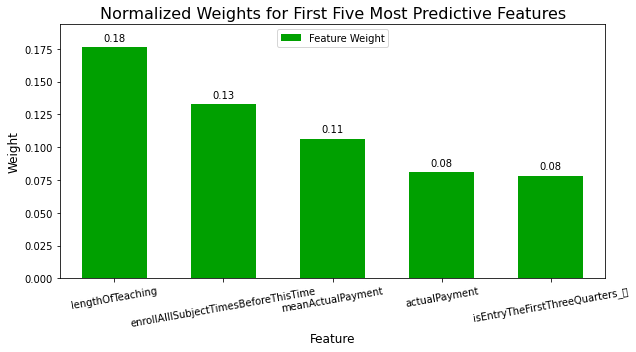

In [9]:
# 导入一个有'feature_importances_'的监督学习模型

# 在训练集上训练一个监督学习模型
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 特征选择

通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，简化模型需要学习的信息。下面代码单元将**只使用五个最重要的特征**在相同的训练集上训练模型。

In [10]:
# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 做一个新的预测
# 初始化模型
clf_A2 = DecisionTreeClassifier(random_state=2)
clf_B2 = LogisticRegression(random_state=2)

# 收集学习器的结果
results2 = {}

# 决策树训练
# 收集学习器的结果
results2['DecisionTreeClassifier'] = train_predict_test(clf_A2, samples_100, X_train_reduced, y_train, X_val_reduced, y_val, X_test_reduced, y_test)

# 逻辑回归训练
results2['LogisticRegression'] = train_predict_test(clf_B2, samples_100, X_train_reduced, y_train, X_val_reduced, y_val, X_test_reduced, y_test)

# 输出模型训练结果
print(results2)

DecisionTreeClassifier trained on 16937 samples.
LogisticRegression trained on 16937 samples.
{'DecisionTreeClassifier': {'train_time': 0.022650718688964844, 'pred_time': 0.004883527755737305, 'acc_train': 0.8, 'acc_val': 0.6481700118063755, 'acc_test': 0.6506706971471755, 'f_train': 0.7724719101123595, 'f_val': 0.4512428298279159, 'f_test': 0.456968773800457}, 'LogisticRegression': {'train_time': 0.017423629760742188, 'pred_time': 0.004334926605224609, 'acc_train': 0.6633333333333333, 'acc_val': 0.6779220779220779, 'acc_test': 0.6771207254864916, 'f_train': 0.4647435897435897, 'f_val': 0.48410061699098245, 'f_test': 0.47642533043992896}}
